### 가설
1. 소득이 낮을수록 예방접종을 필요로 할것이다.
> 중위소득은 모든 가구를 소득 순으로 순위를 매겼을 때, 가운데를 차지한 가구의 소득을 의미한다. ... 이에 따르면 중위소득의 50% 미만을 빈곤층, 50~150%를 중산층, 150% 초과를 상류층으로 본다.
2. 한부모, 조손 가정, 맞벌이 가정의 경우 나라의 지원을 사용하기 비교적 어려울 것이다.

In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('child_data.csv', engine='python')
df

,특성별(1),특성별(2),2018,2018.1,2018.2,2018.3,2018.4,2018.5,2018.6,2018.7,...,2018.38,2018.39,2018.40,2018.41,2018.42,2018.43,2018.44,2018.45,2018.46,2018.47
0,특성별(1),특성별(2),국가예방접종지원,국가예방접종지원,영유아건강검진,영유아건강검진,학교 우유급식지원,학교 우유급식지원,충치예방서비스,충치예방서비스,...,청소년 방과후아카데미,청소년 방과후아카데미,긴급복지교육지원,긴급복지교육지원,교육복지 우선지원,교육복지 우선지원,드림스타트,드림스타트,CYS-Net,CYS-Net
1,특성별(1),특성별(2),이용여부,만족여부,이용여부,만족여부,이용여부,만족여부,이용여부,만족여부,...,이용여부,만족여부,이용여부,만족여부,이용여부,만족여부,이용여부,만족여부,이용여부,만족여부
2,전체,소계,62.2,95.3,45.6,91.6,12.1,87.3,26.8,85.6,...,2.8,59.3,1.9,63.4,2.2,59.6,3.1,83,1.1,55.1
3,표본별,일반,62.4,95.2,45.9,91.6,9.5,84.4,26.2,84.9,...,1.9,45.4,1.1,40.8,1.6,47.5,2.3,79.5,0.7,29.7
4,표본별,수급,57.4,98.5,35.5,94.1,62.3,95.9,40,96.6,...,20.3,83,17.8,93.9,15.8,87.5,19.7,91.2,11.7,97.3
5,소득계층별,중위소득 50% 미만,66,99,44.3,96.2,34.1,96.8,34.7,90,...,15.6,50.4,9.9,54.2,7.4,50.2,11.6,95.6,6.7,63.9
6,소득계층별,중위소득 50~100%,67.2,96.3,51.2,93.5,13.7,87.1,23.6,89.2,...,2.4,83.8,1.7,94.5,2.1,48.3,4,84.9,0.9,27.3
7,소득계층별,중위소득 100~150%,59.1,92.9,41.6,88.2,6.5,77.2,27.8,81,...,1.2,60.8,1.1,54.7,1.9,88.8,1,47.3,0.9,70.1
8,소득계층별,중위소득 150% 이상,54.9,97.1,39.8,91.3,6.9,80.1,24.6,86.2,...,1.3,20.6,0.8,-,0.9,-,2.1,83.6,-,-
9,소득계층별,무응답,70.7,100,78,100,68.3,100,80.5,100,...,-,-,-,-,-,-,-,-,-,-


In [88]:
df_sample = df.iloc[:,[0,1,2,3,4,5,8,9]]
df_sample

,특성별(1),특성별(2),2018,2018.1,2018.2,2018.3,2018.6,2018.7
0,특성별(1),특성별(2),국가예방접종지원,국가예방접종지원,영유아건강검진,영유아건강검진,충치예방서비스,충치예방서비스
1,특성별(1),특성별(2),이용여부,만족여부,이용여부,만족여부,이용여부,만족여부
2,전체,소계,62.2,95.3,45.6,91.6,26.8,85.6
3,표본별,일반,62.4,95.2,45.9,91.6,26.2,84.9
4,표본별,수급,57.4,98.5,35.5,94.1,40,96.6
5,소득계층별,중위소득 50% 미만,66,99,44.3,96.2,34.7,90
6,소득계층별,중위소득 50~100%,67.2,96.3,51.2,93.5,23.6,89.2
7,소득계층별,중위소득 100~150%,59.1,92.9,41.6,88.2,27.8,81
8,소득계층별,중위소득 150% 이상,54.9,97.1,39.8,91.3,24.6,86.2
9,소득계층별,무응답,70.7,100,78,100,80.5,100


In [89]:
df2 = df_sample.rename(columns=df_sample.loc[0])

df3 = df2.drop(0)
df3

,특성별(1),특성별(2),국가예방접종지원,국가예방접종지원,영유아건강검진,영유아건강검진,충치예방서비스,충치예방서비스
1,특성별(1),특성별(2),이용여부,만족여부,이용여부,만족여부,이용여부,만족여부
2,전체,소계,62.2,95.3,45.6,91.6,26.8,85.6
3,표본별,일반,62.4,95.2,45.9,91.6,26.2,84.9
4,표본별,수급,57.4,98.5,35.5,94.1,40,96.6
5,소득계층별,중위소득 50% 미만,66,99,44.3,96.2,34.7,90
6,소득계층별,중위소득 50~100%,67.2,96.3,51.2,93.5,23.6,89.2
7,소득계층별,중위소득 100~150%,59.1,92.9,41.6,88.2,27.8,81
8,소득계층별,중위소득 150% 이상,54.9,97.1,39.8,91.3,24.6,86.2
9,소득계층별,무응답,70.7,100,78,100,80.5,100
10,지역구분별2,대도시,68.8,95.3,50,91.6,28.7,75.8


In [90]:
df_income = df3.drop(index=[1,2,3,4])

df_income = df_income.drop(columns=["특성별(1)"])
df_income = df_income.iloc[:,[0,1,3]]
df_income = df_income.iloc[0:4]
df_income

,특성별(2),국가예방접종지원,영유아건강검진
5,중위소득 50% 미만,66,44.3
6,중위소득 50~100%,67.2,51.2
7,중위소득 100~150%,59.1,41.6
8,중위소득 150% 이상,54.9,39.8


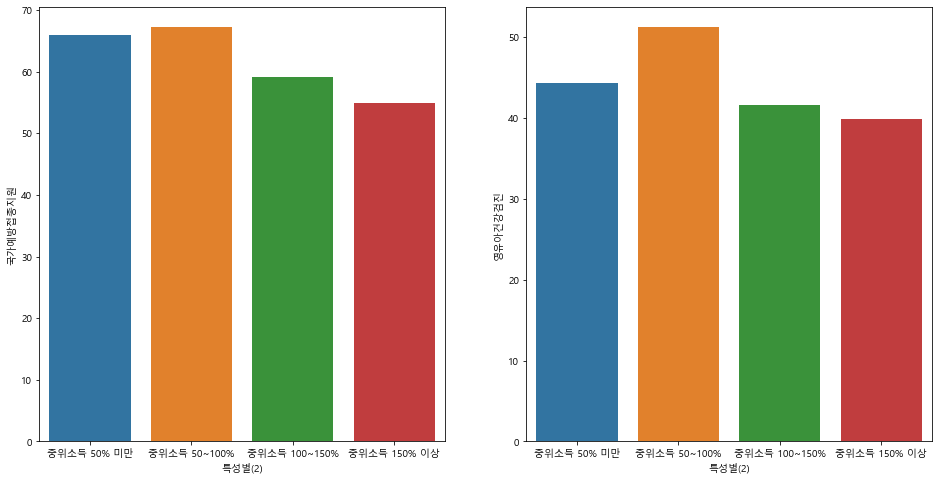

In [92]:
plt.figure(figsize=(16,8))

plt.subplot(121)
sns.barplot(data=df_income, x = '특성별(2)', y = '국가예방접종지원')

plt.subplot(122)
sns.barplot(data=df_income, x = '특성별(2)', y = '영유아건강검진')
plt.show()

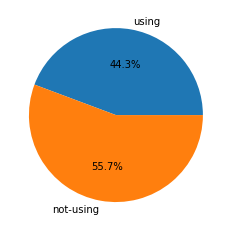

In [42]:
ratio = [44.3, 55.7]
labels = ['using','not-using']

plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.show()

In [98]:
# 가설 2

df_family_type = df3.drop(index=[1,2,3,4])

df_family_type = df_family_type.drop(columns=["특성별(1)"])
df_family_type = df_family_type.iloc[:,[0,1,3]]
df_family_type = df_family_type.iloc[11:14]
df_family_type

,특성별(2),국가예방접종지원,영유아건강검진
16,한부모· 조손,56.1,32.4
17,외벌이,66.5,49.7
18,맞벌이,56.5,40.5


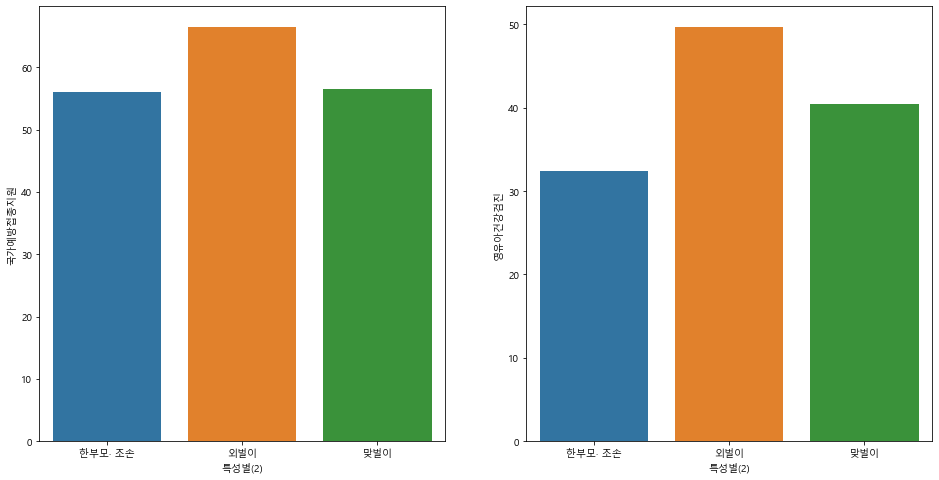

In [99]:
plt.figure(figsize=(16,8))

plt.subplot(121)
sns.barplot(data=df_family_type, x = '특성별(2)', y = '국가예방접종지원')

plt.subplot(122)
sns.barplot(data=df_family_type, x = '특성별(2)', y = '영유아건강검진')
plt.show()